# Aplicação de Lógica Fuzzy com Python: Exemplo das gorgetas

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*


# Instalação e importação das bibliotecas

- Documentação: https://pythonhosted.org/scikit-fuzzy/overview.html

In [ ]:
%pip install scikit-fuzzy
#!pip install scikit-fuzzy == 0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=66750d300dec1358ed02c44764c6724111c179f315213a1b8930942aa3ff099b
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequente

In [ ]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [ ]:
qualidade

Antecedent: qualidade

In [ ]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [ ]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Membership functions

In [ ]:
qualidade.automf(number = 3, names = ['ruim', 'boa', 'saborosa'])
servico.automf(number = 3, names = ['ruim', 'aceitável', 'ótimo'])

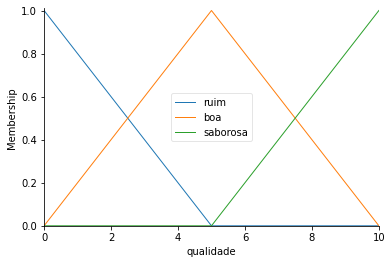

In [ ]:
qualidade.view()

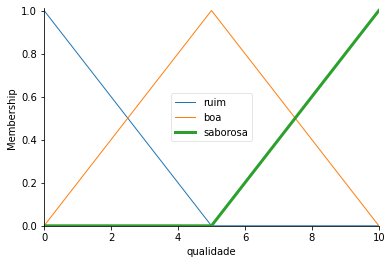

In [ ]:
qualidade['saborosa'].view()

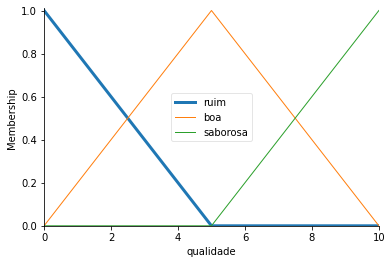

In [ ]:
qualidade['ruim'].view()

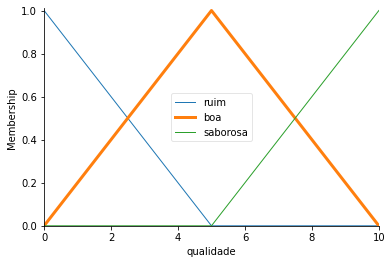

In [ ]:
qualidade['boa'].view()

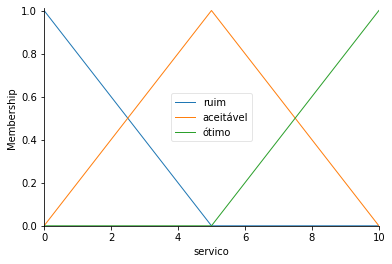

In [ ]:
servico.view()

In [ ]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [ ]:
# função triangular
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 10])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 10, 20])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [10, 20, 20])

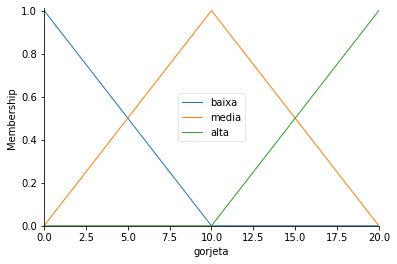

In [ ]:
gorjeta.view()

In [ ]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['qualidade'] = 10
sistema.input['servico'] = 5
sistema.compute()

11.666666666666664


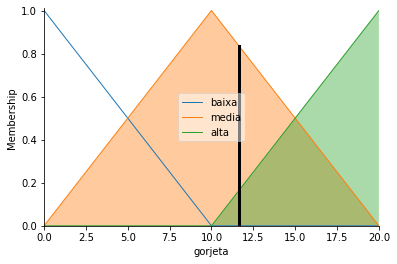

In [ ]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)

# Outras funções

/usr/local/lib/python3.7/dist-packages/skfuzzy/membership/generatemf.py:240: RuntimeWarning: invalid value encountered in true_divide
  y[idx] = 2. * ((x[idx] - d) / (d - c)) ** 2.


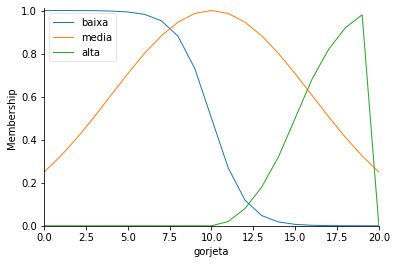

In [ ]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 10, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 6)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 20)
gorjeta.view()

In [ ]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['qualidade'] = 1
sistema.input['servico'] = 1
sistema.compute()

4.145597130601702


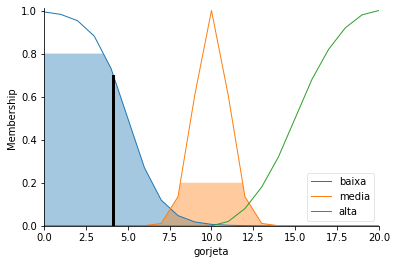

In [ ]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)